In [1]:
#Description : This program attempts to optimize a users portfolo using the Efficient Frontier
#Import the python Libraries
from pandas_datareader import data as web
import warnings
import pandas as pd
import numpy as np
import pyfolio as pf
import yfinance as yf
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

warnings.filterwarnings("ignore")

C:\Users\damil\anaconda3\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


In [2]:
#Get the stock symbols/tickers in the portfolio
#VALUE STOCKS - They typically are mature businesses.Steady (but not spectacular) growth rates.Relatively stable revenues and earnings.
#GROWTH STOCKS - increase their revenue and earnings at a faster rate than the average business in their industry. 
#INCOME STOCKS - reliably pays a dividend to its shareholders, attractive to investors who want to earn short-term yields on their investments

Assets = ['AMZN', 'KO', 'GM', 'WM', 'VZ', 'MSFT', 'TSLA', 'NVDA', 'AMD', 'TLT']

In [3]:
#Get the stock/portfolio starting date
stockStartDate = '2019-01-01'

#Get the stocks ending date (today)
today = datetime.today().strftime('%Y-%m-%d')
today

'2022-06-30'

In [4]:
No_of_assets = len(Assets)

#Assign Weights to the stocks (They have to be of equal weighting)
weights = No_of_assets * [1 / No_of_assets]
No_of_days = 252

In [5]:
#Create a dataframe to store the adjusted close price of the stocks
df = pd.DataFrame()

#Store the adjusted close price of the stock into the df
for stocks in Assets:
    df[stocks] = web.DataReader(stocks, data_source='yahoo', start=stockStartDate, end=today)['Adj Close']

In [6]:
#show the DataFrame
df

,AMZN,KO,GM,WM,VZ,MSFT,TSLA,NVDA,AMD,TLT
Date,,,,,,,,,,
2019-01-02,76.956497,42.011791,31.893356,83.398003,48.088295,97.353912,62.023998,33.824169,18.830000,114.920059
2019-01-03,75.014000,41.752182,30.575533,83.172386,48.259975,93.772453,60.071999,31.780613,17.049999,116.227753
2019-01-04,78.769501,42.584709,31.599455,85.381439,48.380146,98.133743,63.537998,33.816708,19.000000,114.882378
2019-01-07,81.475502,42.029690,32.575974,85.588242,48.689182,98.258904,66.991997,35.607002,20.570000,114.543724
2019-01-08,82.829002,42.504147,33.002617,86.800835,50.114151,98.971336,67.070000,34.720543,20.750000,114.242661
...,...,...,...,...,...,...,...,...,...,...
2022-06-23,112.440002,61.880001,32.990002,147.190002,52.090000,258.859985,705.210022,162.250000,82.430000,114.139999
2022-06-24,116.459999,63.040001,34.820000,150.309998,50.959999,267.700012,737.119995,171.259995,87.080002,112.559998
2022-06-27,113.220001,62.910000,34.630001,149.529999,50.959999,264.890015,734.760010,168.690002,86.160004,111.599998


In [7]:
#Show the daily simple return
returns = df.pct_change().dropna()
returns

,AMZN,KO,GM,WM,VZ,MSFT,TSLA,NVDA,AMD,TLT
Date,,,,,,,,,,
2019-01-03,-0.025241,-0.006179,-0.041320,-0.002705,0.003570,-0.036788,-0.031472,-0.060417,-0.094530,0.011379
2019-01-04,0.050064,0.019940,0.033488,0.026560,0.002490,0.046509,0.057697,0.064067,0.114370,-0.011575
2019-01-07,0.034353,-0.013033,0.030903,0.002422,0.006388,0.001275,0.054361,0.052941,0.082632,-0.002948
2019-01-08,0.016612,0.011289,0.013097,0.014168,0.029267,0.007251,0.001164,-0.024896,0.008751,-0.002628
2019-01-09,0.001714,-0.019166,0.010629,-0.005089,-0.012583,0.014300,0.009483,0.019667,-0.026988,-0.001565
...,...,...,...,...,...,...,...,...,...,...
2022-06-23,0.032033,0.011938,0.004874,0.015734,0.025596,0.022637,-0.004306,-0.008252,-0.015761,0.008215
2022-06-24,0.035752,0.018746,0.055471,0.021197,-0.021693,0.034150,0.045249,0.055532,0.056412,-0.013843
2022-06-27,-0.027821,-0.002062,-0.005457,-0.005189,0.000000,-0.010497,-0.003202,-0.015006,-0.010565,-0.008529


In [8]:
avg_returns = returns.mean() * No_of_days
avg_returns

AMZN    0.157032
KO      0.143019
GM      0.112867
WM      0.198554
VZ      0.034787
MSFT    0.330627
TSLA    0.920181
NVDA    0.570808
AMD     0.558725
TLT     0.011572
dtype: float64

In [9]:
#Create and show annualized covariance matrix 
cov_matrix_annual = returns.cov() * No_of_days
cov_matrix_annual

,AMZN,KO,GM,WM,VZ,MSFT,TSLA,NVDA,AMD,TLT
AMZN,0.114613,0.020200,0.042111,0.020743,0.014603,0.073166,0.102034,0.112392,0.106932,-0.006824
KO,0.020200,0.055722,0.042504,0.035121,0.024877,0.034949,0.029930,0.034976,0.032903,-0.010813
GM,0.042111,0.042504,0.198113,0.042619,0.022250,0.059355,0.106850,0.100301,0.086212,-0.021460
WM,0.020743,0.035121,0.042619,0.055406,0.024746,0.036065,0.025624,0.037430,0.036419,-0.007860
VZ,0.014603,0.024877,0.022250,0.024746,0.036645,0.021070,0.007075,0.020788,0.022934,-0.006603
MSFT,0.073166,0.034949,0.059355,0.036065,0.021070,0.097008,0.102164,0.118259,0.105977,-0.011106
TSLA,0.102034,0.029930,0.106850,0.025624,0.007075,0.102164,0.461674,0.180102,0.168533,-0.014454
NVDA,0.112392,0.034976,0.100301,0.037430,0.020788,0.118259,0.180102,0.266334,0.215213,-0.013726
AMD,0.106932,0.032903,0.086212,0.036419,0.022934,0.105977,0.168533,0.215213,0.305466,-0.012251
TLT,-0.006824,-0.010813,-0.021460,-0.007860,-0.006603,-0.011106,-0.014454,-0.013726,-0.012251,0.028471


In [10]:
#Calculate the portfolio variance 
port_variance = np.dot(weights, np.dot(cov_matrix_annual, weights))
port_variance

0.059441151828180834

In [11]:
#Calculate the portfolio volatility aka standard deviation
port_volatility = np.sqrt(port_variance)
port_volatility

0.24380556152020166

In [12]:
#Calculate the annual portfolio return
portfolioSimpleAnnualReturn = np.sum(returns.mean() * weights) * No_of_days
portfolioSimpleAnnualReturn

0.303817182150798

In [13]:
#Show the expected annual return, volatility (risk), and variance

percent_var = str( round(port_variance, 2) * 100) + '%'
percent_vols = str(round(port_volatility, 2) * 100) + '%'
percent_ret = str(round(portfolioSimpleAnnualReturn, 2) * 100) + '%'

print('Expected annual return: '+ percent_ret)
print('Annual volatility / risk: '+ percent_vols)
print('Annual variance: '+ percent_var)

Expected annual return: 30.0%
Annual volatility / risk: 24.0%
Annual variance: 6.0%


In [14]:
portfolio_returns = pd.Series(np.dot(weights, returns.T),
                              index=returns.index)

Start date,2019-01-03
End date,2022-06-29
Total months,41
,Backtest
Annual return,31.5%
Cumulative returns,159.9%
Annual volatility,24.4%
Sharpe ratio,1.25
Calmar ratio,1.06
Stability,0.92
Max drawdown,-29.8%


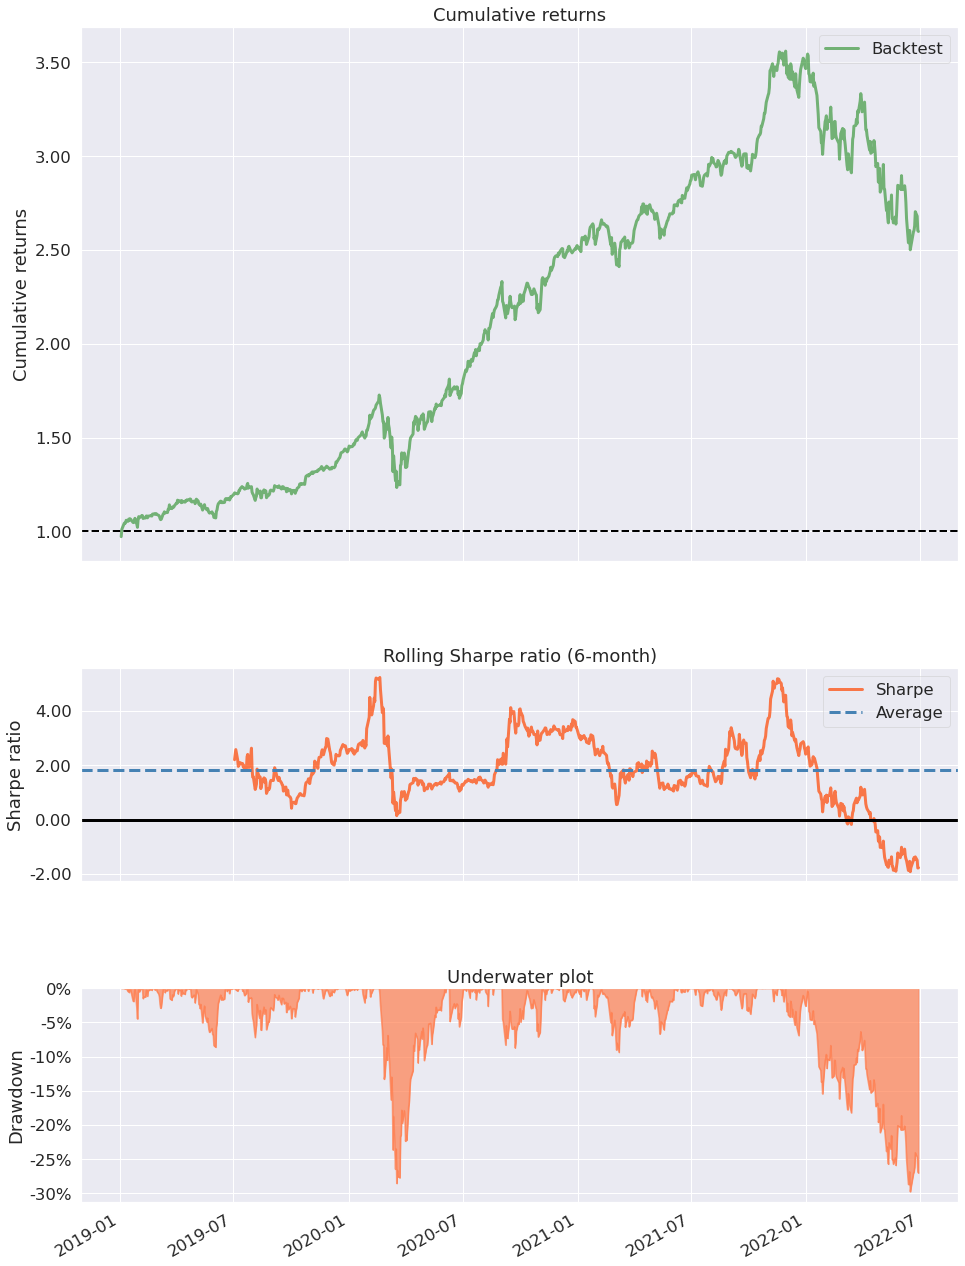

In [15]:
pf.create_simple_tear_sheet(portfolio_returns)

In [16]:
# pf.create_returns_tear_sheet(portfolio_returns)

In [17]:
#pip install pyPortfolioOpt

In [18]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [19]:
#Portfolio Optimization !!!

#Calculate the expected returns and the annualised sample covariance matrix of asset returns
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

#optimize for max sharpe ratio
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose = True)

OrderedDict([('AMZN', 0.0), ('KO', 0.0), ('GM', 0.0), ('WM', 0.37058), ('VZ', 0.0), ('MSFT', 0.0), ('TSLA', 0.34972), ('NVDA', 0.09833), ('AMD', 0.00496), ('TLT', 0.17641)])
Expected annual return: 47.2%
Annual volatility: 29.5%
Sharpe Ratio: 1.53


(0.47159135247407424, 0.29481546602796616, 1.5317763296422051)

In [20]:
#Get the discrete allocation of each share per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value = 20000)

allocation, leftover = da.lp_portfolio()
print('Discrete allocation: ', allocation)
print('Funds remaining: ${:.2f}'.format(leftover))

Discrete allocation:  {'WM': 49, 'TSLA': 10, 'NVDA': 13, 'AMD': 1, 'TLT': 31}
Funds remaining: $105.63


## Simulating Portfolio dynamics using Geometric Brownian Motion

In [ ]:
R_Asset = 'DIS'
Start_Date = '2019-01-01'
End_date = '2022-06-22'

In [22]:
data = yf.download(R_Asset, start=Start_Date,
                  end=End_date, adjusted=True, parse_dates=['date-time'], 
                   index_col = ['date-time'])

[*********************100%***********************]  1 of 1 completed


In [23]:
# data

Average return: 0.01%


<AxesSubplot:title={'center':'DIS returns: 2019-01-01 - 2022-06-22'}, xlabel='Date'>

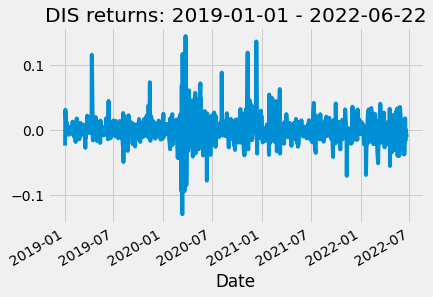

In [24]:
#Calculate the daily returns:
adj_close = data['Adj Close']
returns = adj_close.pct_change().dropna()
print(f'Average return: {100 * returns.mean():.2f}%')
returns.plot(title=f'{R_Asset} returns: {Start_Date} - {End_date}')

In [25]:
train = returns['2019-01-01':'2020-12-22']
test = returns['2021-01-01':'2022-06-22']

In [27]:
# Specify the parameters of the simulation:
T = len(test)
N = len(test)
S_0 = data[train.index[-1].datetime()]
No_of_SIM = 100
mu = train.mean()
sigma = train.std()

AttributeError: 'Timestamp' object has no attribute 'datetime'

In [ ]:
#Define the function for simulations:
def simulate_gbm(s_0, mu, sigma, n_sims, T, N):
    dt = T/N
    dW = np.random.normal(scale = np.sqrt(dt),
                          size=(n_sims, N))
    W = np.cumsum(dW, axis=1)
 
    time_step = np.linspace(dt, T, N)
    time_steps = np.broadcast_to(time_step, (n_sims, N))
    S_t = s_0 * np.exp((mu - 0.5 * sigma ** 2) * time_steps
                       + sigma * W)
    S_t = np.insert(S_t, 0, s_0, axis=1)
    return S_t

In [ ]:
#Run the simulations:
gbm_simulations = simulate_gbm(S_0, mu, sigma, N_SIM, T, N)

In [ ]:
#Plot the simulation results:
# prepare objects for plotting

LAST_TRAIN_DATE = train.index[-1].date()
FIRST_TEST_DATE = test.index[0].date()
LAST_TEST_DATE = test.index[-1].date()
PLOT_TITLE = (f'{RISKY_ASSET} Simulation '
              f'({FIRST_TEST_DATE}:{LAST_TEST_DATE})')
selected_indices = adj_close[LAST_TRAIN_DATE:LAST_TEST_DATE].index
index = [date.date() for date in selected_indices]
gbm_simulations_df = pd.DataFrame(np.transpose(gbm_simulations),
                                  index=index)

# plotting
ax = gbm_simulations_df.plot(alpha=0.2, legend=False)
line_1, = ax.plot(index, gbm_simulations_df.mean(axis=1),
                  color='red')
line_2, = ax.plot(index, adj_close[LAST_TRAIN_DATE:LAST_TEST_DATE],
                  color='blue')
ax.set_title(PLOT_TITLE, fontsize=16)
ax.legend((line_1, line_2), ('mean', 'actual'))